# Temperature dependence of hydrophobic interactions

A Python exploration of
[_Dissolution of cellulose in alkali: A competition between ionization and hydrophobic interactions_](https://doi.org/10.1016/j.molliq.2025.128169).
The idea is to extend the temperature dependence to cover interactions between hydrophobic residues in proteins; the free energy reference used here could e.g. by the interaction strength in an attractive pair-potential.

_M. Lund, 2025_.

---

For alkanes, $c=\frac{\Delta C_p}{\Delta G} \approx 1.9\cdot 10^{-2}\, K^{-1}$ (Eq. 12) and we note that $cT_c \approx 5.6$ for $T_c = 293$ K.
Combining with Eq. 15 and integrating, we get:
$$
\begin{aligned}
\Delta G(T) &= \Delta G(T_c) + \int_{T_c}^T \frac{\Delta G(T_c)}{T_c} 
\Big( 1 - c T_c \ln\frac{T}{T_c} \Big) \, dT \\
&= \Delta G(T_c) \Bigg[ 
T \Big(\frac{1}{T_c} + c - c \ln\frac{T}{T_c} \Big) - c T_c
\Bigg] \\
&\approx \Delta G(T_c) \left[ 1 + u - \frac{1}{2} c T_c u^2 \right], \quad u = \frac{T}{T_c} - 1. \\
&\approx \Delta G(T_c) \left[ 1 + \frac{T}{T_c} - 1 - \frac{1}{2} c T_c \Big(\frac{T}{T_c} - 1\Big)^2 \right]
\end{aligned}
$$

In the last step we have expanded around $T_c$ up to second order.
This differs from Eq. 16 which seems to come from first expanding Eq. 15, then integrating the truncated series. If so, the constant "0.19" in Eq. 16 should rather be $c / (2T_c)$.

From this analysis we see that the effects from the higher order $c$-dependent terms are small, and that the $T$-dependence is dominated by the linear first order term.

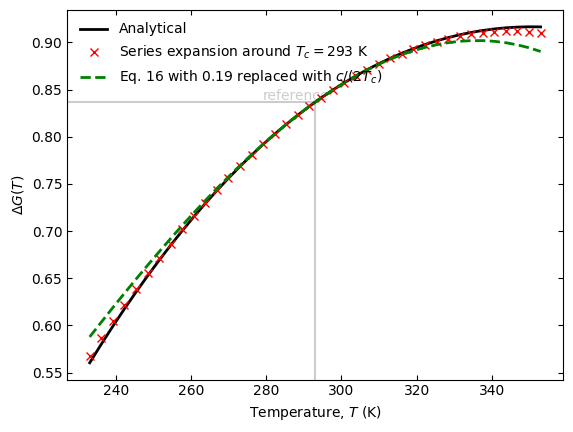

In [9]:
import numpy as np
import matplotlib.pyplot as plt
#from scipy.integrate import quad

Tc = 293  # Reference temperature, kelvin
G_tc = 0.8368  # Hydrophobic free energy at ref. temperature; units of energy
c = 1.9e-2  # Ratio from Eq. 12, inverse kelvin
dT = 120 # Temperature interval to plot, kalvin

def dGdT(T):
    """Eq. 15. Derivative function dG/dT"""
    return G_tc / Tc * (1 - c * Tc * np.log(T / Tc))


#def G_numerical(T):
#    """Numerical integration"""
#    integral, _ = quad(dGdT, Tc, T)
#    return G_tc + integral


def G_analytical(T):
    """Analytical solution"""
    return G_tc * (T * (1 / Tc + c - c * np.log(T / Tc)) - c * Tc)


def G_approx(T):
    """Series expansion of exact solution around Tc, up to second order"""
    u = T / Tc - 1
    return G_tc * (1 + u - 0.5 * c * Tc * u**2)


def G_hakan(T):
    '''Eq. 16 with 0.19 replaced with c/2T_c. Comes from first expanding derivates, then integrating(?)'''
    return T / Tc * G_tc * (1 - 0.5 * c / Tc * (T - Tc)**2 )

T_vals = np.linspace(Tc - dT/2, Tc + dT/2, 40)
G_exact = np.array([G_analytical(T) for T in T_vals])
#G_num = np.array([G_numerical(T) for T in T_vals])
G_approx = np.array([G_approx(T) for T in T_vals])
G_hakan = np.array([G_hakan(T) for T in T_vals])

fig, ax = plt.subplots()
ax.plot(T_vals, G_exact, "k-", label="Analytical", linewidth=2)
#ax.plot(T_vals, G_num, "bo", label="Numerical", linewidth=2, alpha=0.5)
ax.plot(T_vals, G_approx, "rx", label=f"Series expansion around $T_c={Tc}$ K", linewidth=2)
ax.plot(T_vals, G_hakan, "g--", label=r"Eq. 16 with 0.19 replaced with $c/(2T_c)$", linewidth=2)

ax.set_xlabel(r"Temperature, $T$ (K)")
ax.set_ylabel(r"$\Delta G(T)$")
ax.tick_params(direction="in", top=True, right=True)
ax.legend(frameon=False, loc=2)
ax.hlines(G_tc, ax.get_xlim()[0], Tc, color='k', alpha=0.2)
ax.vlines(Tc, ax.get_ylim()[0], G_tc, color='k', alpha=0.2)
ax.text(279, G_tc+0.002, "reference", alpha=0.2)
ax.relim()
plt.show()